# Notebook 2 — Financial Modelling Pipeline & Time-Series Essentials


**You can make your own copy of this notebook by selecting `File` -> `Save a copy in Drive` from the menu bar above.**

This notebook focuses on how financial machine learning is actually done in practice; from structured workflows to handling real market data correctly.

Rather than jumping straight into models, we build the foundations that prevent common financial modelling mistakes.

## What this notebook covers

- Understand the full ML lifecycle using CRISP-ML(Q)
- Work hands-on with real financial market data in Python
Learn essential time-series concepts used in finance
- Learn essential time-series concepts used in finance
- Use GenAI responsibly to support financial analysis

---

## Part 1 - ML Lifecycle Process using CRISP-ML(Q)

<p align="center">
<img src="https://miro.medium.com/v2/resize:fit:720/format:webp/1*G-3cDSvXkUOnx5a6AHAHVA.png" width="500">
</p>

*Reference:* https://medium.com/@sathishv700/crisp-ml-q-a-methodical-approach-to-quality-assurance-and-machine-learning-development-a8026222ba14

Cross-Industry Standard Process for the development of Machine Learning applications with Quality assurance methodology also known as CRISP-ML(Q), is a practical framework that describes the typical lifecycle of a machine learning project.

1. **Business & Data Understanding:** Define the problem clearly and confirm what data is available to solve it.
2. **Data Engineering (Data Preparation):** Clean, transform, and prepare the dataset so it is usable for modelling.
3. **Machine Learning Model Building:** Train one or more models to learn patterns from the prepared data.
4. **Model Evaluation:** Measure how well the model performs on unseen data using appropriate metrics.
5. **Model Deployment:** Make the model available for real-world use (e.g., app, dashboard, API).
6. **Monitoring & Maintenance:** Track model performance over time and update/retrain when needed.

*Reference:* https://ml-ops.org/content/crisp-ml

<br>

---

## Part 2 - Exploring Financial Data with Python and AI

**Step 1:** Import required libraries

- `pandas`: Used for data manipulation and analysis. Provides DataFrames, time indexing, and transformation tools that are essential for financial data work.  
  https://pandas.pydata.org/

- `yfinance`: Used to download historical financial market data (stocks, ETFs, indices, crypto) directly from Yahoo Finance.  
  https://pypi.org/project/yfinance/

- `matplotlib`: Used for plotting and visualising time-series data, returns, volatility, and model outputs.  
  https://matplotlib.org/


In [ ]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

**Step 2:** Download Historical Price Data

We use `yfinance` to pull daily market data.

#### Where to find tickers

You can search for tickers directly on **Yahoo Finance**:
- Go to https://finance.yahoo.com
- Search for a company, index, ETF, or asset
- The ticker symbol appears at the top of the page

<p align="center">
<img src="https://image2url.com/r2/default/images/1769276230689-72a851f1-3324-4f9e-8994-19b53d7ba6d0.png" width="500">
</p>





In [ ]:
ticker = "AAPL"
start_date = "2018-01-01" # YYYY-MM-DD
end_date = "2026-01-01" # YYYY-MM-DD

df = yf.download(ticker, start=start_date, end=end_date)

/tmp/ipython-input-1424472585.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


**Step 3:** Inspect the Raw Data

Always inspect before doing anything else.

In [ ]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2018-01-02,40.341888,40.351258,39.639313,39.850088,102223600
2018-01-03,40.334869,40.878196,40.271640,40.405128,118071600
2018-01-04,40.522213,40.625258,40.299731,40.407458,89738400
2018-01-05,40.983578,41.070228,40.526904,40.618239,94640000
2018-01-08,40.831356,41.126437,40.732992,40.831356,82271200


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2011 entries, 2018-01-02 to 2025-12-31
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   2011 non-null   float64
 1   (High, AAPL)    2011 non-null   float64
 2   (Low, AAPL)     2011 non-null   float64
 3   (Open, AAPL)    2011 non-null   float64
 4   (Volume, AAPL)  2011 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 94.3 KB


In [ ]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,2011.000000,2011.000000,2011.000000,2011.000000,2.011000e+03
mean,135.516368,136.883995,134.013735,135.385616,9.442735e+07
std,66.815304,67.395886,66.164062,66.749710,5.447156e+07
min,33.799671,34.638779,33.754506,34.225167,1.791060e+07
25%,64.388020,64.942769,63.586081,64.228580,5.563230e+07
50%,142.940979,144.480327,141.249072,142.793683,8.096270e+07
75%,182.963089,184.725338,181.101238,182.653872,1.151288e+08
max,286.190002,288.619995,283.299988,286.200012,4.265100e+08


Observations:
- Columns typically include: `Open`, `High`, `Low`, `Close`, `Adj Close`, `Volume`
- Rows are indexed by date
- Prices are not yet suitable for ML

**Step 4:** Check the Time Index

Time must be:
- correctly typed
- sorted
- consistent

`.index` represents the row labels of a dataset.

When you download data using `yfinance`, the dates are automatically stored as the DataFrame **index**.

This is what makes the dataset usable for time-series analysis and forecasting.



In [ ]:
df.index

DatetimeIndex(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05',
               '2018-01-08', '2018-01-09', '2018-01-10', '2018-01-11',
               '2018-01-12', '2018-01-16',
               ...
               '2025-12-17', '2025-12-18', '2025-12-19', '2025-12-22',
               '2025-12-23', '2025-12-24', '2025-12-26', '2025-12-29',
               '2025-12-30', '2025-12-31'],
              dtype='datetime64[ns]', name='Date', length=2011, freq=None)

`.sort_index()` ensures the time-series is in correct chronological order so past values always come before future values. This is essential for forecasting and avoiding data leakage.


In [ ]:
df = df.sort_index()

**Step 5:** Plot for Visual Sanity Check

Plot the price to confirm it looks reasonable.

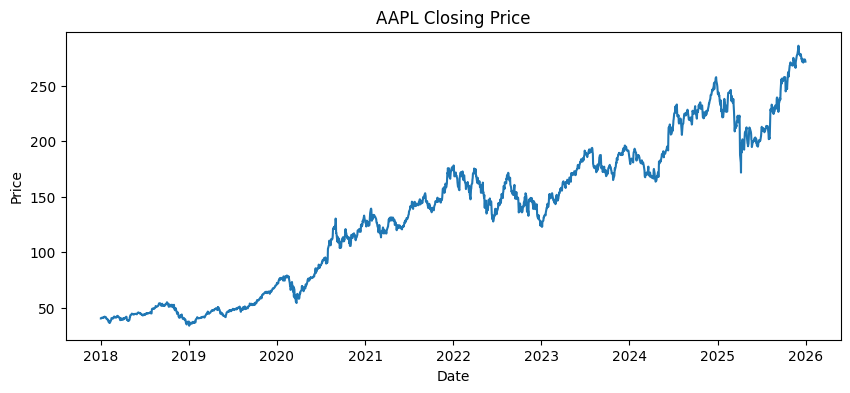

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(df["Close"])
plt.title(f"{ticker} Closing Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

### ➕ Additional: Plotting with Multiple Assets

In [ ]:
tickers = ["AAPL", "MSFT"]
start_date = "2018-01-01"
end_date = "2026-01-01"

df_multi = yf.download(tickers, start=start_date, end=end_date)


/tmp/ipython-input-132758544.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_multi = yf.download(tickers, start=start_date, end=end_date)
[*********************100%***********************]  2 of 2 completed


In [ ]:
close_prices = df_multi["Close"]
close_prices.head()

Ticker,AAPL,MSFT
Date,,
2018-01-02,40.341885,79.050392
2018-01-03,40.334873,79.418282
2018-01-04,40.522209,80.117241
2018-01-05,40.983578,81.110580
2018-01-08,40.831345,81.193329


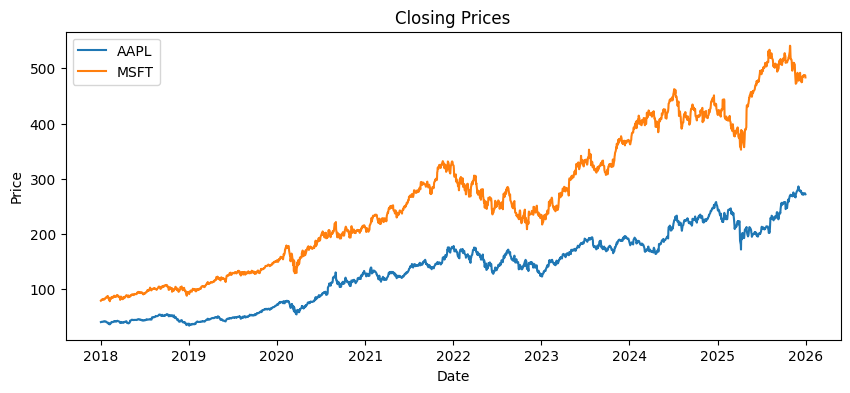

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(close_prices["AAPL"], label="AAPL")
plt.plot(close_prices["MSFT"], label="MSFT")
plt.title("Closing Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

<br>

### ➕ Additional: Using GenAI to analyse data

When you connect to an AI model like **Google Gemini**, you need an **API key**.  Think of it as a secure password that allows your notebook to use the service. You can create and access your API keys here: https://aistudio.google.com/app/api-keys

Google Colab provides a built-in way to store this safely using **Secrets**.

**Step 1**: Open Secrets

- Click the 🔑 **Secrets** icon in the left sidebar

**Step 2**: Add your API key

Click **Add new secret** and enter:

- **Name:** `GEMINI_API_KEY`  
- **Value:** your Gemini API key  
- Turn on **Notebook access**

**Step 3**: Use it in Python

```python
from google.colab import userdata
userdata.get('GEMINI_API_KEY')


In [ ]:
from google.colab import userdata
from google import genai

api_key = userdata.get("GEMINI_API_KEY")   # use your real secret name here

client = genai.Client(api_key=api_key)


In [ ]:
df_test = df[["Close"]].tail(40)  # keep small to avoid huge prompts

prompt = f"""
You are a financial market analyst reviewing historical price data.

Context:
Ticker: {ticker}
Time period covered: {df_test.index.min().date()} to {df_test.index.max().date()}

Latest price observations:
{df_test.to_string()}

Tasks:

1) Summarise the overall price behaviour in 3 concise bullets
   (trend direction, volatility level, notable shifts or regime changes)

2) Write a short risk commentary (2 sentences) focusing on:
   - drawdown behaviour
   - stability vs turbulence

3) Provide 1 practical caveat an investor should keep in mind when interpreting this data.

Keep the tone professional and concise.
Do not invent numerical values — base observations only on the data shown.
"""

response = client.models.generate_content(
    model="gemini-2.5-flash",
    contents=prompt
)

print(response.text)


Here's an analysis of the AAPL price data:

1)  **Overall Price Behaviour Summary:**
    *   The stock exhibited an overall slight upward trend from the start (269.77) to the end (271.85) of the period, but with significant intra-period fluctuations.
    *   A notable bullish rally occurred in late November to early December, pushing the price to a peak of 286.19 on December 2nd.
    *   This peak was followed by a subsequent downturn and a period of relatively lower prices, stabilizing in a slightly declining range through the end of December.

2)  **Risk Commentary:**
    The data reveals susceptibility to notable drawdowns after periods of strong upward momentum, indicating intermittent phases of turbulence. While moments of relative stability are present, the overall behaviour suggests that gains can be partially eroded by subsequent pullbacks.

3)  **Practical Caveat:**
    Investors should be aware that this analysis is based on a relatively short historical period (less than two

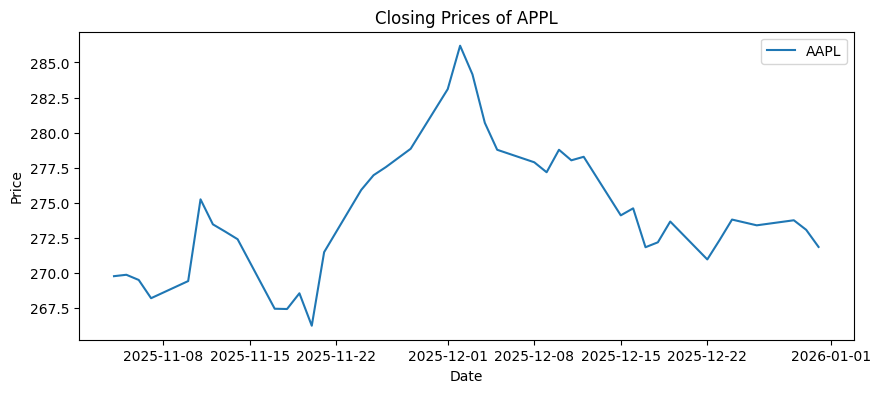

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(df_test["Close"], label="AAPL")
plt.title("Closing Prices of APPL")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

### Advice on writing a Good Prompts for Financial Analysis

1. *Give clear context*: State the role, asset, and time period.

2. *Share only relevant data/information*

3. *Be specific about outputs*: Tell it how many bullets, sentences, and what to focus on. This avoids vague responses.

4. *Set clear limits*: Ask it not to invent numbers and to use only the data shown. This reduces hallucinations.

**Simple prompt engineering rule:**

`Role + Context + Data + Tasks + Limits`

Following this keeps LLM responses focused, accurate, and useful for financial analysis.

---


<br>

## Part 3 - Why Financial Data Is Treated as Time-Series

Financial market data is **ordered in time**.

Each price:
- depends on what happened before  
- influences what happens next  

This time order carries information about trends, momentum, volatility, regime changes, etc. Machine learning models need this structure to learn meaningful patterns.

If we treat financial data like a normal table:

- past and future can mix together  
- models can accidentally “see the future”  
- performance looks unrealistically good  

This is called **data leakage** - one of the biggest mistakes in financial modelling.

<p align="center">
<img src="https://www.researchgate.net/publication/363423518/figure/fig3/AS:11431281084804798@1663390710962/Schematic-of-random-and-chronological-train-test-split-The-train-dataset-is-used-to-train_W640.jpg" width="500">
</p>

*Reference:* https://doi.org/10.1016/j.xcrp.2022.101052

Ignoring time leads to:
- misleading results  
- fragile models  
- poor real-world performance  

#### Now, lets see how we can convert any financial data into a time-series

Before building any financial model, we always apply the basic data handling steps from Part 2 to ensure the **date index is correct and sorted**.  

With those fundamentals in place, lets proceed further.

<br>

**Step 1: Select the series you want (e.g., Close)**

Pandas has two data structures as follows:<br>
1. A Series is 1-dimensional labeled array that can hold data of any type (integer, string, boolean, float, python objects, and so on). It’s axis labels are collectively called an index.<br>
2. A DataFrame is 2-dimensional labeled data structure with columns. It supports multiple datatypes.


In [ ]:
prices = df["Close"]

**Step 2: Check for missing values**

In [ ]:
prices.isna().sum()

,0
Ticker,
AAPL,0


**Step 3: Convert prices into returns**

Raw prices tend to trend upward over long periods, which makes them harder for models to learn from directly.  

What matters more in finance is **how much the price changes from one day to the next**.

This is why we work with **returns** instead of prices.

#### *Note on stationarity*
Many time-series methods work best when data is reasonably stable over time. This is called **stationarity**.  
Converting prices to returns is similar to a technique known as **differencing**, which helps remove trends and make patterns easier to model.

<p align="center">
<img src="https://d1rwhvwstyk9gu.cloudfront.net/2022/05/Fig.-2-Non-Stationary-Time-Series-1.png" width="500">
</p>

*Reference:* https://blog.quantinsti.com/stationarity/



In [ ]:
returns = prices.pct_change().dropna()

Can you think why we use `.dropna()` here despite checking/removing missing data earlier?

<details>
  <summary><b>Click here to view answer.</b></summary>

  <br>
The first return is missing (there is no previous day to compare with), so we remove it to keep the dataset clean for modelling.

</details>

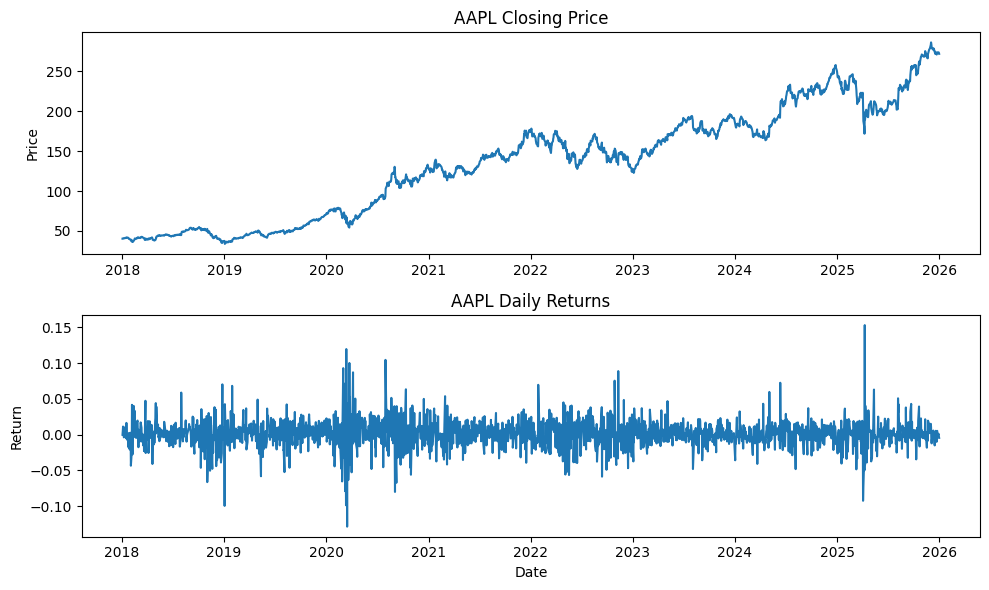

In [ ]:
plt.figure(figsize=(10,6))

# Top: price
plt.subplot(2,1,1)
plt.plot(prices)
plt.title(f"{ticker} Closing Price")
plt.ylabel("Price")

# Bottom: returns
plt.subplot(2,1,2)
plt.plot(returns)
plt.title(f"{ticker} Daily Returns")
plt.xlabel("Date")
plt.ylabel("Return")

plt.tight_layout()
plt.show()


#### How does return links back to prices

Rather than predicting raw prices directly, models typically:

1) predict future **returns**  
2) then convert those returns back into **prices**

This works better because:

- returns are more stable over time  
- patterns are easier to learn  
- models behave more reliably  

Formally,

If today’s price is: $P_t$

and the predicted return is: $r_{t+1}$

then tomorrow’s price is: $P_{t+1}= P_t \times (1 + r_{t+1})$

So returns drive price movements.


### ➕ Additional: Rolling calculation

A **rolling calculation** looks at a fixed window of recent data and moves forward one step at a time.

Instead of using all past data at once, it repeatedly uses the **most recent N periods**.

For example:

- 20-day rolling average → average of the last 20 days  
- 20-day rolling volatility → volatility of the last 20 days  

Markets change over time, so:

- recent behaviour matters more than very old data  
- risk and trends evolve continuously  #R

Rolling metrics adapt to these changes.




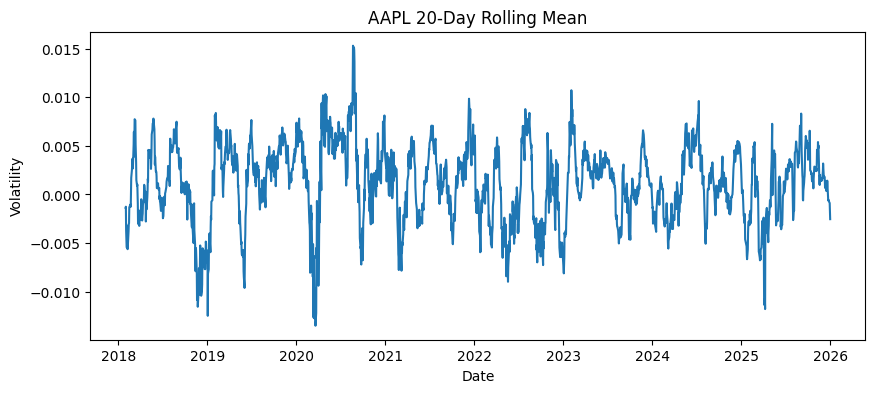

In [ ]:
#rolling mean
rolling_mean_20 = returns.rolling(20).mean()

plt.figure(figsize=(10,4))
plt.plot(rolling_mean_20)
plt.title(f"{ticker} 20-Day Rolling Mean")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.show()

**Key Observations**

- Fluctuates around zero, showing short-term momentum rather than long-term trend  
- Periods of positive values indicate short bursts of upward movement  
- Negative dips highlight short-term pullbacks and corrections  

**Why it’s useful:**  
Captures recent market direction while smoothing daily noise.


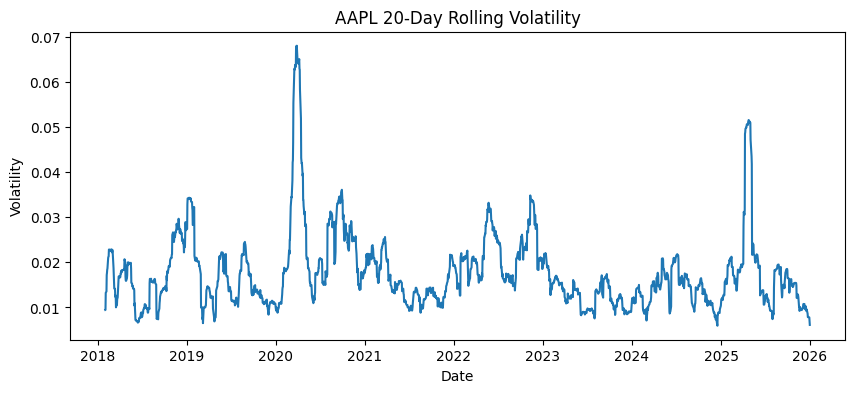

In [ ]:
#rolling volatility
rolling_vol_20 = returns.rolling(20).std()

plt.figure(figsize=(10,4))
plt.plot(rolling_vol_20)
plt.title(f"{ticker} 20-Day Rolling Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.show()

**Key Observations**

- Volatility rises in clusters rather than randomly  
- Large spikes appear during market stress periods (e.g., around 2020 and 2025)  
- Calm periods are followed by calm; turbulent periods follow turbulence  

**Why it’s useful:**  
Measures changing risk levels and market regimes over time.

<br>

### ➕ Additional: Winsorising

#### Outliers and Market Shocks in Financial Data

Financial returns are not nicely distributed around an average.  
They often contain **extreme movements**, especially during market stress.

These can come from:

- real market crashes and rallies  
- sudden news or macro shocks  
- occasional data errors  

This means:

- outliers may represent real risk, not noise  
- removing them blindly can hide crashes  
- models trained only on “average behaviour” underestimate risk  

However, the presence of outliers can significantly skew the results and interpretations of a data set. Outliers, being extreme values that deviate markedly from the rest of the data, can be problematic, especially when they are the result of measurement error, data entry mistakes, or simply natural but rare events. One common technique to mitigate the impact of outliers is **winsorising**, a method named after the statistician Charles P. Winsor.

<p align="center">
<img src="https://miro.medium.com/v2/resize:fit:640/format:webp/0*jf5IVJ998iLhRKf5.gif" width="500">
</p>

*Reference:* https://pub.aimind.so/winsorizing-a-balancing-act-in-statistical-analysis-d4d78dffc9c8


What winsorisation does:
- Limits extreme values instead of removing them  
- Caps very high and very low returns at chosen thresholds  
- Keeps the full dataset size unchanged  

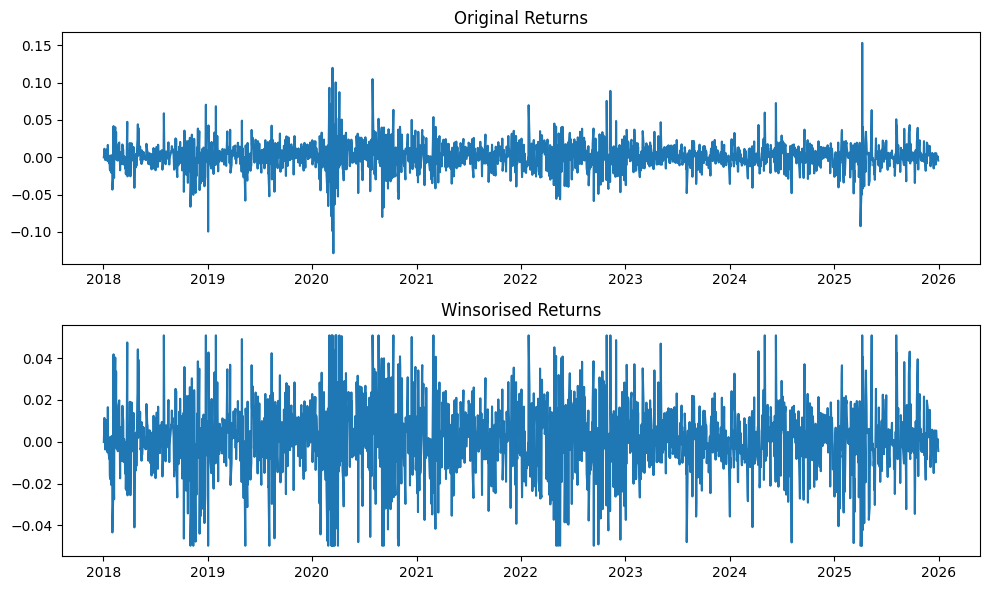

In [ ]:
# Convert a one-column DataFrame into a proper time-series (Series)
r = returns.squeeze()

# Compute cut-off thresholds (1% tails)
lower = r.quantile(0.01)
upper = r.quantile(0.99)

# Winsorise (clip extremes)
wins_returns = r.clip(lower, upper)

# Plot comparison
plt.figure(figsize=(10,6))

plt.subplot(2,1,1)
plt.plot(r)
plt.title("Original Returns")

plt.subplot(2,1,2)
plt.plot(wins_returns)
plt.title("Winsorised Returns")

plt.tight_layout()
plt.show()


⚠️ **Important**: This stabilises models but can hide real crash risk.